<a href="https://colab.research.google.com/github/koll-ai/stable-diffusion-qrcode/blob/master/colabs/demo_sdqrcode_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sdqrcode python-dotenv
!pip install git+https://github.com/huggingface/diffusers


In [ ]:
import sdqrcode.sdqrcode as sdqrcode
import dotenv
import os


edit and run the cell bellow with your webui infos or run the cell and edit /content/webui.env

In [ ]:
%%file webui.env
AUTO_API_HOSTNAME=xxx
AUTO_API_PORT=7860
AUTO_API_HTTPS=true
AUTO_API_USERNAME=xxx
AUTO_API_PASSWORD=xxx

Writing webui.env


# Use default config

stable diffusion models [{'title': 'dreamshaperv6.safetensors [853e7e85c4]', 'model_name': 'dreamshaperv6', 'hash': '853e7e85c4', 'sha256': '853e7e85c46be9ad4815666cd335545df32dab5e0d22afe5ccc6ad9bda834b52', 'filename': '/stable-diffusion-webui/models/Stable-diffusion/dreamshaperv6.safetensors', 'config': None}, {'title': 'v1-5-pruned-emaonly.safetensors [6ce0161689]', 'model_name': 'v1-5-pruned-emaonly', 'hash': '6ce0161689', 'sha256': '6ce0161689b3853acaa03779ec93eafe75a02f4ced659bee03f50797806fa2fa', 'filename': '/stable-diffusion-webui/models/Stable-diffusion/v1-5-pruned-emaonly.safetensors', 'config': None}, {'title': 'v2-1_768-ema-pruned.safetensors [dcd690123c]', 'model_name': 'v2-1_768-ema-pruned', 'hash': 'dcd690123c', 'sha256': 'dcd690123cfc64383981a31d955694f6acf2072a80537fdb612c8e58ec87a8ac', 'filename': '/stable-diffusion-webui/models/Stable-diffusion/v2-1_768-ema-pruned.safetensors', 'config': None}, {'title': 'realisticvision2.0.safetensors [c0d1994c73]', 'model_name': '

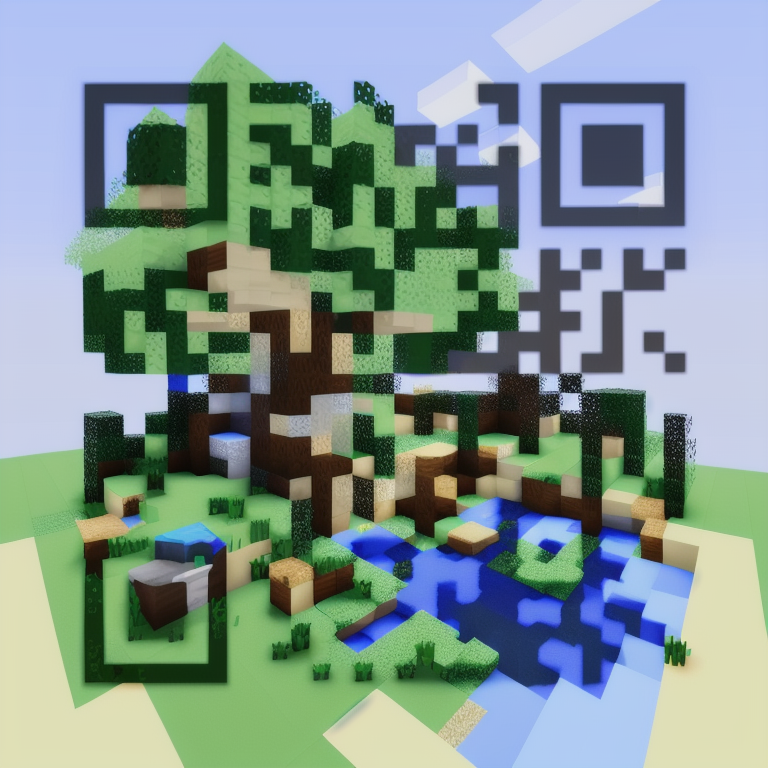

In [ ]:
dotenv.load_dotenv("/content/webui.env", override=True)

sd_qr_codes,_ = sdqrcode.init_and_generate_sd_qrcode(
            config_name_or_path="default_auto",
            auto_api_hostname=os.getenv("AUTO_API_HOSTNAME"),
            auto_api_port=os.getenv("AUTO_API_PORT"),
            auto_api_https=os.getenv("AUTO_API_HTTPS") == "true",
            auto_api_username=os.getenv("AUTO_API_USERNAME"),
            auto_api_password=os.getenv("AUTO_API_PASSWORD"),
        )

sd_qr_codes[0]

# Use custom config

Edit the following cell with your args

In [ ]:
%%file config_custom.yaml
global:
  prompt: "a beautiful minecraft landscape, lights and shadows"
  model_name_or_path: "6ce0161689"
  steps: 20
  sampler_name: Euler a
  cfg_scale: 7
  width: 768
  height: 768
  seed: -1

controlnet_units:
  brightness:
    model: control_v1p_sd15_brightness [5f6aa6ed]
    module: none
    weight: 0.35
    start: 0.0
    end: 1.0

  tile:
    model: control_v11f1e_sd15_tile [a371b31b]
    module: none
    weight: 0.5
    start: 0.35
    end: 0.70

qrcode:
  text: "https://koll.ai"
  error_correction: high # [low, medium, quart, high]
  box_size: 10
  border: 4
  fill_color: black
  back_color: white


In [ ]:
dotenv.load_dotenv("/content/webui.env", override=True)

sd_qr_codes,_ = sdqrcode.init_and_generate_sd_qrcode(
            config_name_or_path="./config_custom.yaml",
            auto_api_hostname=os.getenv("AUTO_API_HOSTNAME"),
            auto_api_port=os.getenv("AUTO_API_PORT"),
            auto_api_https=os.getenv("AUTO_API_HTTPS") == "true",
            auto_api_username=os.getenv("AUTO_API_USERNAME"),
            auto_api_password=os.getenv("AUTO_API_PASSWORD"),
        )

sd_qr_codes[0]